In [1]:
import pandas as pd
import numpy as np

c:\Users\Alfre\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Alfre\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\Alfre\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [45]:
df = pd.read_csv('precios_autos.csv')
ordf = df.copy()
df.head()

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype,cylindernumber,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,ohcv,six,152,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,sedan,fwd,front,99.8,176.6,66.2,54.3,...,ohc,four,109,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,sedan,4wd,front,99.4,176.6,66.4,54.3,...,ohc,five,136,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape

(205, 21)

En el dataframe contamos con 21 features y 205 observaciones.

In [7]:
df.head(1)

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype,cylindernumber,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,13495.0


In [8]:
#ver los tipos de datos
df.dtypes


symboling             int64
CarName              object
fueltype             object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [9]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Podemos ver que tenemos varias variables categoricas, por lo cual es necesario convertirlas a variables numericas para poder trabajar con ellas.

In [30]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler

# Categorical Data - Nominal (Label Encoding)
label_encoder = LabelEncoder()
df['cylindernumber'] = label_encoder.fit_transform(df['cylindernumber'])


# Use get_dummies for one-hot encoding
df = pd.get_dummies(df, columns=['fueltype', 'carbody','drivewheel', 'enginelocation', 'enginetype'],  drop_first=True)



In [31]:
df

,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,stroke,...,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,2,130,2.68,...,0,0,1,0,0,0,0,0,0,0
1,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,2,130,2.68,...,0,0,1,0,0,0,0,0,0,0
2,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,3,152,3.47,...,0,0,1,0,0,0,0,0,1,0
3,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,2,109,3.40,...,0,1,0,0,0,0,1,0,0,0
4,2,audi 100ls,99.4,176.6,66.4,54.3,2824,1,136,3.40,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),109.1,188.8,68.9,55.5,2952,2,141,3.15,...,0,0,1,0,0,0,1,0,0,0
201,-1,volvo 144ea,109.1,188.8,68.8,55.5,3049,2,141,3.15,...,0,0,1,0,0,0,1,0,0,0
202,-1,volvo 244dl,109.1,188.8,68.9,55.5,3012,3,173,2.87,...,0,0,1,0,0,0,0,0,1,0
203,-1,volvo 246,109.1,188.8,68.9,55.5,3217,3,145,3.40,...,0,0,1,0,0,0,1,0,0,0


Despues de aplicar la transformacion a variables dummy para las variables categoricas y usar labelencoder para volver numericas las variables que tienen un orden, nos quedamos con 30 features. Igualmente es importante recordar que para el modelo de regresion lineal, se debe eliminar una de las variables dummy para evitar la el problema de la multicolinearidad perfecta.

In [32]:
df.isna().sum()

symboling              0
CarName                0
wheelbase              0
carlength              0
carwidth               0
carheight              0
curbweight             0
cylindernumber         0
enginesize             0
stroke                 0
compressionratio       0
horsepower             0
peakrpm                0
citympg                0
highwaympg             0
price                  0
fueltype_gas           0
carbody_hardtop        0
carbody_hatchback      0
carbody_sedan          0
carbody_wagon          0
drivewheel_fwd         0
drivewheel_rwd         0
enginelocation_rear    0
enginetype_dohcv       0
enginetype_l           0
enginetype_ohc         0
enginetype_ohcf        0
enginetype_ohcv        0
enginetype_rotor       0
dtype: int64

De igual forma podemos observar que no contamos con valores nulos en el dataframe, así que podemos seguir trabajando con el sin problema. A continuación vamos a ver como se distribuyen las variables númericas

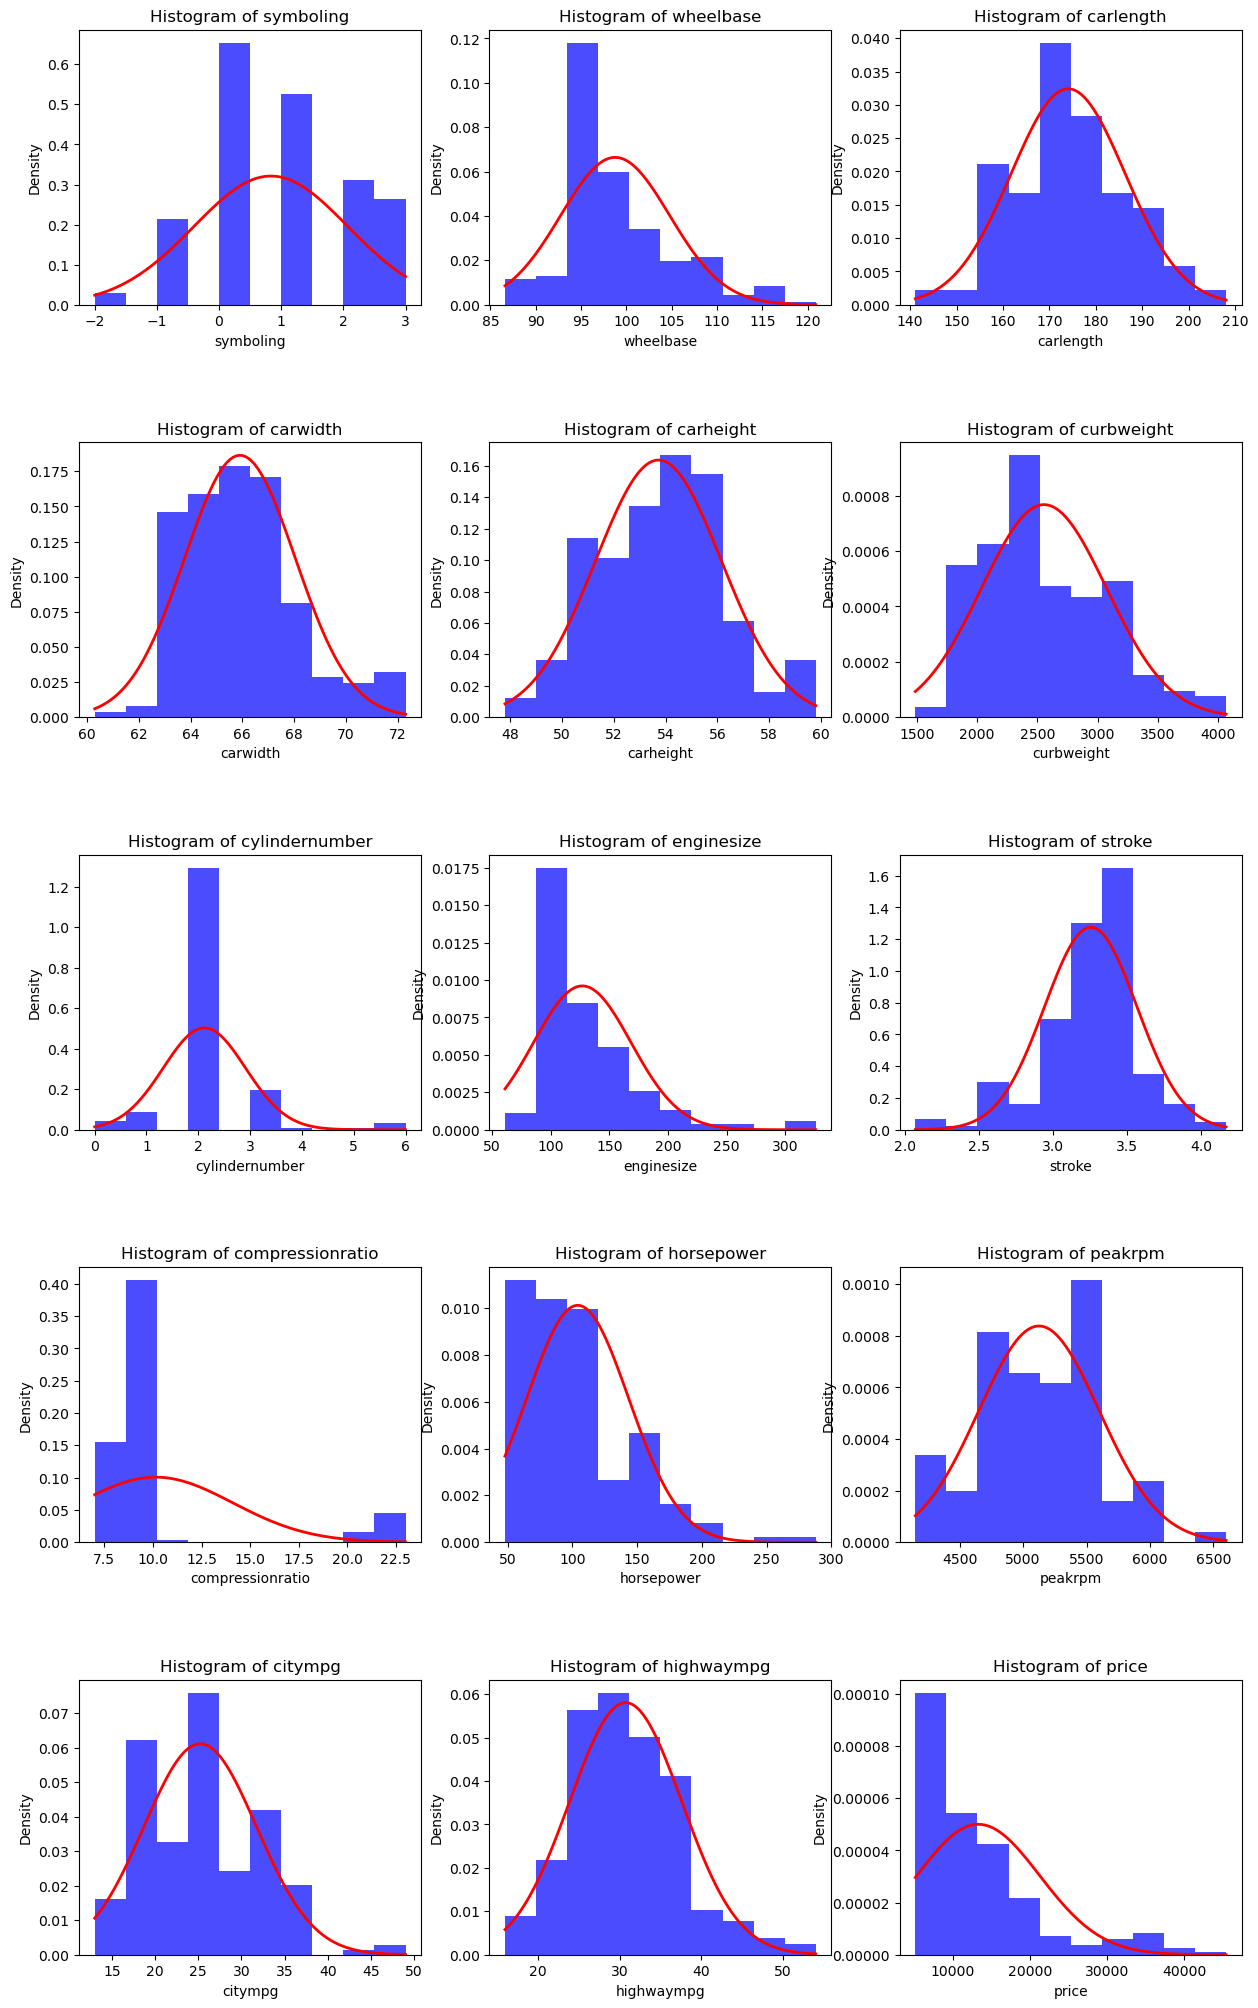

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Filter out non-numeric columns
numeric_df = df.select_dtypes(include=np.number)

numeric_df = numeric_df[['symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']]

# Determine the number of rows and columns for subplots
num_cols = len(numeric_df.columns)
num_rows = num_cols // 3 + (num_cols % 3 > 0)  # Calculate the number of rows based on 3 plots per level

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
fig.subplots_adjust(hspace=0.5)

for i, col_name in enumerate(numeric_df.columns):
    row, col = i // 3, i % 3
    X1 = numeric_df[col_name]
    title_ = f'Histogram of {col_name}'
    ax = axes[row, col]
    
    ax.hist(X1, density=True, color='blue', alpha=0.7)
    x = np.linspace(min(X1), max(X1), 100)
    y = stats.norm.pdf(x, loc=np.mean(X1), scale=np.std(X1))
    ax.plot(x, y, 'r-', linewidth=2)
    ax.set_title(title_)
    ax.set_xlabel(col_name)
    ax.set_ylabel('Density')

# Remove any unused subplots
for i in range(num_cols, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.show()

Podemos ver que las variables cuya distribución se asemeja más a la de una normal  asimple vista son:

- highwaympg
- carlenght
- peakrpm
- carheight
- carwidth

In [42]:
numeric_df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,2.117073,126.907317,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,0.795792,41.642693,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,0.000000,61.000000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,2.000000,97.000000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,2.000000,120.000000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,2.000000,141.000000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,6.000000,326.000000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Podemos ver que entre las variables que nos parecieron interesantes al mirar la distribución obtenemos que la media de los datos se encuentra practicamente en la mitad del intervalo y en los casos en los que no es así podemos ver que aun se mantiene entre el IQR (intervalo intercuartilico) por lo que confirmamos el analisis que hicimos anteriormente con los histogramas.

In [46]:
# List of qualitative variables
qualitative_vars = ['fueltype', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber']

# Perform frequency analysis for each qualitative variable
for var in qualitative_vars:
    frequency_table = ordf[var].value_counts().reset_index()
    frequency_table.columns = [var, 'Frequency']
    print(frequency_table)
    print("\n")

  fueltype  Frequency
0      gas        185
1   diesel         20


       carbody  Frequency
0        sedan         96
1    hatchback         70
2        wagon         25
3      hardtop          8
4  convertible          6


  drivewheel  Frequency
0        fwd        120
1        rwd         76
2        4wd          9


  enginelocation  Frequency
0          front        202
1           rear          3


  enginetype  Frequency
0        ohc        148
1       ohcf         15
2       ohcv         13
3       dohc         12
4          l         12
5      rotor          4
6      dohcv          1


  cylindernumber  Frequency
0           four        159
1            six         24
2           five         11
3          eight          5
4            two          4
5          three          1
6         twelve          1




Podemos ver al analizar las frecuencias en las variables categoricas que en la mayoría de las variable shay un desbalance muy marcado entre las categorias, por lo que es necesario tener cuidado al momento de hacer el split de los datos para el entrenamiento y la prueba al modelar. Además de esto antes de descartarlas tenemos que ver si nos pueden aportar información relevante para el análisis.

c:\Users\Alfre\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\Alfre\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\Alfre\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\Alfre\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\Alfre\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\Alfre\anaco

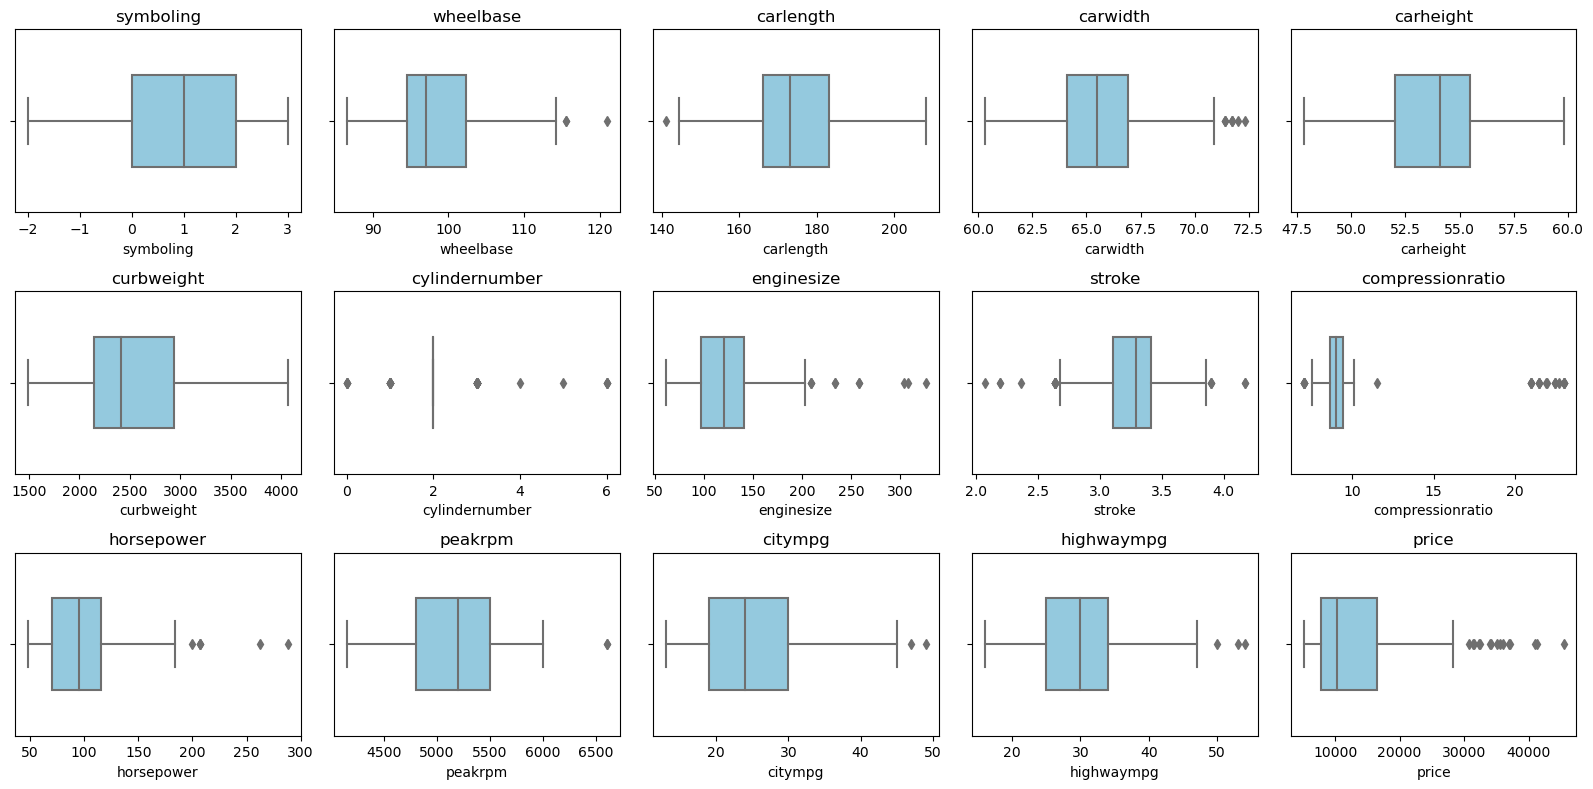

In [51]:
import seaborn as sns

# Lista de variables numéricas
numeric_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

# Crear subplots para los boxplots
plt.figure(figsize=(16, 8))
plt.subplots_adjust(wspace=0.5)

# Crear boxplots para cada variable numérica
for i, var in enumerate(numeric_df, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x=numeric_df[var], orient="vertical", width=0.5, color="skyblue")
    plt.title(var)

# Mostrar los boxplots
plt.tight_layout()
plt.show()

Podemos ver que en las variables numericas tenemos una distribución de los datos muy similar a la de una normal en las variables que habíamos notado en un inicio viendo los histogramas

In [ ]:
#creamos un 